# Private 1위 장어님 코드 공부

In [2]:
#패키지 불러오기 및 각종 설치 & 폰트 설정 한방에 
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
matplotlib.rcParams['axes.unicode_minus'] = False

!pip install catboost
!pip install pycaret
from tqdm.notebook import tqdm
from pycaret.regression import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

NanumBarunGothic


In [3]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [4]:
import matplotlib.font_manager as font_manager
sys_font = fm.findSystemFonts()

[ f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/true

In [5]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic Eco


In [6]:
from google.colab import drive  
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [7]:
import os
workspace_path = '/gdrive/My Drive/주차수요예측/' 
data_path = os.path.join(workspace_path, '데이터')

In [8]:
age_gender = pd.read_csv(os.path.join(data_path, 'age_gender_info.csv'))
train = pd.read_csv(os.path.join(data_path, 'train.csv'))
test = pd.read_csv(os.path.join(data_path, 'test.csv'))

## 데이터 탐색 및 전처리

In [9]:
train.head(3)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [11]:
train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
train['임대보증금'] = train['임대보증금'].astype(float)
test['임대보증금'] = test['임대보증금'].astype(float)

train.loc[train.임대료=='-', '임대료'] = np.nan
test.loc[test.임대료=='-', '임대료'] = np.nan
train['임대료'] = train['임대료'].astype(float)
test['임대료'] = test['임대료'].astype(float)

In [12]:
##1번 데이터 오류
train = train[train.단지코드 != 'C1804']
train = train[train.단지코드 != 'C2405']
train = train[train.단지코드 != 'C1740']
train = train[train.단지코드 != 'C1206']

##2번 데이터 오류
train = train[train.단지코드 != 'C2085']
train = train[train.단지코드 != 'C1397']
train = train[train.단지코드 != 'C2431']
train = train[train.단지코드 != 'C1649']
train = train[train.단지코드 != 'C1036']

##3번 데이터 오류 
train = train[train.단지코드 != 'C1095']
train = train[train.단지코드 != 'C2051']
train = train[train.단지코드 != 'C1218']
train = train[train.단지코드 != 'C1894']
train = train[train.단지코드 != 'C2483']
train = train[train.단지코드 != 'C1502']
train = train[train.단지코드 != 'C1988']

### 1) train, test 버스 수 이상치 보정

-> test에 50 을 train.mean으로 보정

In [13]:
train['도보 10분거리 내 버스정류장 수'].unique()

array([ 3.,  1.,  2.,  6., 10.,  5.,  4.,  7., 12., 14.,  8.,  0., 20.,
       11., 16., 15., 19.])

In [14]:
test['도보 10분거리 내 버스정류장 수'].unique()

array([ 2.,  3., 16.,  6.,  1.,  4.,  5.,  8., 10., 13.,  7., 11., 50.,
       12., 14., 18., 15., 19., 17.])

In [15]:
test.loc[test['도보 10분거리 내 버스정류장 수'] == 50, '도보 10분거리 내 버스정류장 수'] = train['도보 10분거리 내 버스정류장 수'].mean()

### 2) train,test 지하철,버스 null 값 0으로 채우기

In [16]:
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)
test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)
train['도보 10분거리 내 버스정류장 수'] = train['도보 10분거리 내 버스정류장 수'].fillna(0)

### 3) 임대료 및 임대보증금 처리


'임대상가' 공급 유형에 한하여 해당 지역의 train의 임대료와 임대보증금 평균값으로 처리

In [17]:
#임대료 처리 
train.loc[train['공급유형'] == '공공분양', '임대료'] = train['임대료'].fillna(0)
train.loc[train['공급유형'] == '장기전세', '임대료'] = train['임대료'].fillna(0)
train.loc[train['공급유형'] == '국민임대', '임대료'] = train['임대료'].fillna(0)
train.loc[train['공급유형'] == '행복주택', '임대료'] = train['임대료'].fillna(0)

#임대보증금 처리
train.loc[train['공급유형'] == '공공분양', '임대보증금'] = train['임대보증금'].fillna(0)
train.loc[train['공급유형'] == '장기전세', '임대보증금'] = train['임대보증금'].fillna(0)
train.loc[train['공급유형'] == '국민임대', '임대보증금'] = train['임대보증금'].fillna(0)
train.loc[train['공급유형'] == '행복주택', '임대보증금'] = train['임대보증금'].fillna(0)

In [18]:
#train의 임대 상가
#임대 상가의 임대료 처리 
train.loc[train['지역'] == '부산광역시', '임대료'] = train['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
train.loc[train['지역'] == '대전광역시', '임대료'] = train['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean())
train.loc[train['지역'] == '경상남도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '경상남도']['임대료'].mean())
train.loc[train['지역'] == '충청남도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '충청남도']['임대료'].mean())
train.loc[train['지역'] == '강원도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())
train.loc[train['지역'] == '제주특별자치도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '제주특별자치도']['임대료'].mean())

#임대 상가의 임대보증금 처리 
train.loc[train['지역'] == '부산광역시', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
train.loc[train['지역'] == '대전광역시', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean())
train.loc[train['지역'] == '경상남도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '경상남도']['임대보증금'].mean())
train.loc[train['지역'] == '충청남도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '충청남도']['임대보증금'].mean())
train.loc[train['지역'] == '강원도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())
train.loc[train['지역'] == '제주특별자치도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '제주특별자치도']['임대보증금'].mean())

In [19]:
#임대료 처리 
test.loc[test['공급유형'] == '영구임대', '임대료'] = test['임대료'].fillna(0)
test.loc[test['공급유형'] == '행복주택', '임대료'] = test['임대료'].fillna(0)

#임대보증금 처리
test.loc[test['공급유형'] == '영구임대', '임대보증금'] = test['임대보증금'].fillna(0)
test.loc[test['공급유형'] == '행복주택', '임대보증금'] = test['임대보증금'].fillna(0)

In [20]:
#test의 임대 상가
#임대 상가의 임대료 처리  (test 특성 기준 test null 값 처리는 data leakage 여서 train의 지역 기준으로 test 처리)
test.loc[test['지역'] == '부산광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
test.loc[test['지역'] == '대전광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean())
test.loc[test['지역'] == '울산광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '울산광역시']['임대료'].mean())
test.loc[test['지역'] == '충청남도', '임대료'] = test['임대료'].fillna(train[train['지역'] == '충청남도']['임대료'].mean())
test.loc[test['지역'] == '강원도', '임대료'] = test['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())  


#임대 상가의 임대보증금 처리 
test.loc[test['지역'] == '부산광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
test.loc[test['지역'] == '대전광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean())
test.loc[test['지역'] == '울산광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '울산광역시']['임대보증금'].mean())
test.loc[test['지역'] == '충청남도', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '충청남도']['임대보증금'].mean())
test.loc[test['지역'] == '강원도', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())

### 4) 자격유형 처리


c2411의 자격유형이 전부 A라서 A로 채워줌<BR>
c2253의 영구임대 유형은 모두 C라서 C로 채워줌

In [21]:
test[test.자격유형.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0


In [22]:
test[test.단지코드=='C2411']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000.0,171480.0,0.0,2.0,840.0


In [23]:
test.loc[test.단지코드.isin(['C2411']) & test.자격유형.isnull(), '자격유형'] = 'A'

In [22]:
test[test.단지코드=='C2253']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2.249000e+06,44770.00000,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3.731000e+06,83020.00000,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3.731000e+06,83020.00000,0.0,2.0,173.0
261,C2253,1161,상가,강원도,임대상가,13.77,1,0.0,D,1.772704e+07,179965.25974,0.0,2.0,173.0
262,C2253,1161,상가,강원도,임대상가,22.89,1,0.0,D,1.772704e+07,179965.25974,0.0,2.0,173.0
263,C2253,1161,상가,강원도,임대상가,22.91,1,0.0,D,1.772704e+07,179965.25974,0.0,2.0,173.0
264,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,1.772704e+07,179965.25974,0.0,2.0,173.0
265,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,1.772704e+07,179965.25974,0.0,2.0,173.0
266,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,1.772704e+07,179965.25974,0.0,2.0,173.0
267,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,1.772704e+07,179965.25974,0.0,2.0,173.0


In [24]:
test.loc[test.단지코드.isin(['C2253']) & test.자격유형.isnull(), '자격유형'] = 'C'

### 5) 공급 + 자격

공급유형과 자격유형이 어느 정도의 관련성이 있을 것이라고 예상하여 이를 합쳐 새로운 특성으로 바꾸었다. 실제로 고유값이 그렇게 많이 만들어지지 않았음을 확인하였다.

In [25]:
train['공급_자격'] = train.apply(lambda r : r['공급유형'] + '_' +r['자격유형'], axis=1)
test['공급_자격'] = test.apply(lambda r : r['공급유형'] + '_' +r['자격유형'], axis=1)
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,공급_자격
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0,국민임대_A
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,국민임대_A
10,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,국민임대_A
11,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0,국민임대_A
12,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0,국민임대_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0,국민임대_A
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,국민임대_A
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,국민임대_A
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,국민임대_A


### 6) train,test에만 있는 공급+유형 찾아서 없애기

In [26]:
print("train - test (공급_자격 차집합) : ", set(train.공급_자격).difference(set(test.공급_자격))) ##train에만 있는 값들 찾아보기 
print("test - train (공급_자격 차집합) : ", set(test.공급_자격).difference(set(train.공급_자격)))

train - test (공급_자격 차집합) :  {'영구임대_F', '영구임대_E', '행복주택_O', '장기전세_A', '국민임대_B', '공공분양_D', '영구임대_A', '공공임대(5년)_A'}
test - train (공급_자격 차집합) :  {'영구임대_D'}


In [27]:
train = train[train.공급_자격 != '공공분양_D']
train = train[train.공급_자격 != '공공임대(5년)_A']
train = train[train.공급_자격 != '국민임대_B']
train = train[train.공급_자격 != '영구임대_A']
train = train[train.공급_자격 != '영구임대_E']
train = train[train.공급_자격 != '영구임대_F']
train = train[train.공급_자격 != '장기전세_A']
train = train[train.공급_자격 != '행복주택_O']

test = test[test.공급_자격 != '영구임대_D']

### 7) 전용면적 수정

In [28]:
train['전용면적'] = train['전용면적']//2*2  ##현재는 2*2일 때 가장 성능이 좋았었다. 
test['전용면적'] = test['전용면적']//2*2

In [29]:
print("train - test (전용면적 차집합) : ", set(train.전용면적).difference(set(test.전용면적))) ##train에만 있는 값들 찾아보기 
print("test - train (전용면적 차집합) : ", set(test.전용면적).difference(set(train.전용면적)))

train - test (전용면적 차집합) :  {66.0, 136.0, 72.0, 108.0, 52.0, 406.0, 56.0, 126.0, 316.0, 62.0}
test - train (전용면적 차집합) :  {8.0, 252.0}


In [30]:
train = train[train.전용면적 != 52]##
train = train[train.전용면적 != 56]##
train = train[train.전용면적 != 62]##
train = train[train.전용면적 != 64]
train = train[train.전용면적 != 66] ##
train = train[train.전용면적 != 72] ##
train = train[train.전용면적 != 78]
train = train[train.전용면적 != 108] ##
train = train[train.전용면적 != 126]##
train = train[train.전용면적 != 136]##
train = train[train.전용면적 != 316]##
train = train[train.전용면적 != 406]##

test = test[test.전용면적 != 8]
test = test[test.전용면적 != 252]

### 8) 지역

In [31]:
print("train - test (지역 차집합) : ", set(train.지역).difference(set(test.지역))) ##train에만 있는 값들 찾아보기 
print("test - train (지역 차집합) : ", set(test.지역).difference(set(train.지역)))

train - test (지역 차집합) :  {'서울특별시'}
test - train (지역 차집합) :  set()


In [32]:
train = train[train.지역 != '서울특별시'] ##컬럼의 특정 값이면 제거하는 방법 

### 9) age_gender.csv에서 미성년자(20대 미만) 비율만 가져와서 join

미성년자 비율이 높다면 등록차량수가 낮을 거라고 생각

In [33]:
minors = ['10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)']
age_gender['미성년자'] = age_gender[minors].sum(axis=1)

In [34]:
train = train.merge(age_gender, left_on= ["지역"], right_on= ["지역"], how='left')
test = test.merge(age_gender, left_on= ["지역"], right_on= ["지역"], how='left')

## 데이터 정리 및 병합

In [35]:
print(train.shape)
print(train.drop_duplicates().shape)

(2719, 39)
(2311, 39)


In [36]:
print(test.shape)
print(test.drop_duplicates().shape)

(1017, 38)
(891, 38)


In [37]:
train = train.drop_duplicates()
test = test.drop_duplicates()

In [38]:
unique_cols = ['총세대수', '지역', '공가수', '미성년자', 
               '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
               '도보 10분거리 내 버스정류장 수',
               '단지내주차면수', '등록차량수']

train_agg = train.set_index('단지코드')[unique_cols].drop_duplicates()
test_agg = test.set_index('단지코드')[[col for col in unique_cols if col!='등록차량수']].drop_duplicates()               

In [39]:
train_agg.head(3)

,총세대수,지역,공가수,미성년자,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
단지코드,,,,,,,,
C2515,545,경상남도,17.0,0.163127,0.0,3.0,624.0,205.0
C1407,1216,대전광역시,13.0,0.140571,1.0,1.0,1285.0,1064.0
C1470,696,전라북도,14.0,0.176920,0.0,2.0,645.0,553.0


In [40]:
# 임대 건물 구분, 전용면적 별 세대수, 임대보증금
tr = train.groupby(['단지코드']).mean() ##같은 단지코드 안에서의 평균 값, max 값 등은 data leakage가 아닌 것으로 보임 
ts = test.groupby(['단지코드']).mean()

train_agg['전용면적별세대수 평균'] = tr['전용면적별세대수']
test_agg['전용면적별세대수 평균'] = ts['전용면적별세대수']

train_agg['임대보증금 평균'] = tr['임대보증금']
test_agg['임대보증금 평균'] = ts['임대보증금']

train_agg['임대료 평균'] = tr['임대료']
test_agg['임대료 평균'] = ts['임대료']

In [41]:
tr = train.groupby(['단지코드']).nunique(dropna=False)
ts = test.groupby(['단지코드']).nunique(dropna=False)

train_agg['임대건물구분'] = tr['임대건물구분']
test_agg['임대건물구분'] = ts['임대건물구분']

## categotical 값들 펼치기

In [42]:
def reshape_cat_features(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:col for col in res.columns})
    return res

In [43]:
def reshape_cat_features_plus_underbar(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:cast_col+'_'+ str(col) for col in res.columns})
    return res

In [44]:
def transportation_level(x): ##대중교통 값 조정 (원래 있던 값을 drop 하지 않았을 때 더 성능이 잘 나옴)
  result = 0
  if x <= 0 :
    result = 5
  elif 1 <= x <= 2:
    result = 4
  elif 3 <= x <= 4 :
    result = 3
  elif 5 <= x <= 6 :
    result = 2
  elif 7 <= x:
    result = 1
  return result

In [45]:
train_data = pd.concat([train_agg.drop(columns=['지역']), reshape_cat_features(data=train, cast_col='공급_자격', value_col='counter'),
                        reshape_cat_features(data=train, cast_col='지역', value_col='counter'),
                       reshape_cat_features_plus_underbar(data=train, cast_col='전용면적', value_col='counter')
                       ], axis=1)
test_data = pd.concat([test_agg.drop(columns=['지역']), reshape_cat_features(data=test, cast_col='공급_자격', value_col='counter'),
                       reshape_cat_features(data=test, cast_col='지역', value_col='counter'),
                       reshape_cat_features_plus_underbar(data=test, cast_col='전용면적', value_col='counter')
                      ], axis=1)

train_data['실거주율'] = (train_agg['총세대수'] - train_agg['공가수'])/train_agg['총세대수']
test_data['실거주율'] = (test_agg['총세대수'] - test_agg['공가수'])/test_agg['총세대수']

transport = ['도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수']
train_data['대중교통현황'] = train_agg[transport].sum(axis=1)
test_data['대중교통현황'] = test_agg[transport].sum(axis=1)

# train_data['대중교통현황'] = train_data['대중교통현황'].apply(transportation_level) 
# test_data['대중교통현황'] = test_data['대중교통현황'].apply(transportation_level)

In [46]:
train_data.shape, test_data.shape

((397, 74), (150, 73))

In [47]:
train_data.corr()['등록차량수'].sort_values() 

임대건물구분                         -0.311428
임대상가_D                         -0.311428
영구임대_C                         -0.299785
전용면적_30.0                      -0.275161
전용면적_16.0                      -0.192724
전용면적_18.0                      -0.190636
전용면적_22.0                      -0.188035
전용면적_14.0                      -0.179229
전용면적_26.0                      -0.163453
충청남도                           -0.156585
전용면적_34.0                      -0.155123
행복주택_J                         -0.150918
전용면적_36.0                      -0.140418
전용면적_240.0                     -0.138809
강원도                            -0.135423
행복주택_L                         -0.109586
공공임대(50년)_A                    -0.106944
전용면적_42.0                      -0.106508
경상남도                           -0.104168
전용면적_54.0                      -0.099762
전용면적_582.0                     -0.097285
전용면적_32.0                      -0.093903
제주특별자치도                        -0.092740
전용면적_248.0                     -0.082940
행복주택_K          

In [48]:
train_data['주차면수/총세대'] = train_data['단지내주차면수'] / train_data['총세대수']
test_data['주차면수/총세대'] = test_data['단지내주차면수'] / test_data['총세대수']

## log취하기
train_data['총세대수log'] = np.log1p(train_data['총세대수'])
test_data['총세대수log'] = np.log1p(test_data['총세대수'])

train_data['단지내주차면수log'] = np.log1p(train_data['단지내주차면수'])
test_data['단지내주차면수log'] = np.log1p(test_data['단지내주차면수'])

train_data['단지내주차면수/100'] = train_data['단지내주차면수']/100
test_data['단지내주차면수/100'] = test_data['단지내주차면수']/100

train_data['버스지하철log'] = np.log1p(train_data['대중교통현황'])
test_data['버스지하철log'] = np.log1p(test_data['대중교통현황'])

train_data['전용면적별세대수 평균 log'] = np.log1p(train_data['전용면적별세대수 평균'])
test_data['전용면적별세대수 평균 log'] = np.log1p(test_data['전용면적별세대수 평균'])

train_data['임대보증금 평균 log'] = np.log1p(train_data['임대보증금 평균'])
test_data['임대보증금 평균 log'] = np.log1p(test_data['임대보증금 평균'])

train_data['임대료 평균 log'] = np.log1p(train_data['임대료 평균'])
test_data['임대료 평균 log'] = np.log1p(test_data['임대료 평균'])

In [49]:
##target 값 비율로 바꾸고 필요 없는 특성 제거
train_data['주차면수대비등록확률'] = train_data['등록차량수'] / train_data['단지내주차면수']
train_data = train_data.drop(columns=['등록차량수'])

In [50]:
train_data.head(3)

,총세대수,공가수,미성년자,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,전용면적별세대수 평균,임대보증금 평균,임대료 평균,임대건물구분,공공임대(10년)_A,공공임대(50년)_A,공공임대(분납)_A,국민임대_A,국민임대_E,국민임대_G,국민임대_H,영구임대_C,영구임대_I,임대상가_D,행복주택_J,행복주택_K,행복주택_L,행복주택_M,행복주택_N,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,전용면적_12.0,전용면적_14.0,전용면적_16.0,전용면적_18.0,전용면적_20.0,전용면적_22.0,전용면적_24.0,전용면적_26.0,전용면적_28.0,전용면적_30.0,전용면적_32.0,전용면적_34.0,전용면적_36.0,전용면적_38.0,전용면적_40.0,전용면적_42.0,전용면적_44.0,전용면적_46.0,전용면적_48.0,전용면적_50.0,전용면적_54.0,전용면적_58.0,전용면적_60.0,전용면적_74.0,전용면적_82.0,전용면적_84.0,전용면적_240.0,전용면적_248.0,전용면적_400.0,전용면적_404.0,전용면적_582.0,실거주율,대중교통현황,주차면수/총세대,총세대수log,단지내주차면수log,단지내주차면수/100,버스지하철log,전용면적별세대수 평균 log,임대보증금 평균 log,임대료 평균 log,주차면수대비등록확률
C2515,545,17.0,0.163127,0.0,3.0,624.0,77.857143,1.678714e+07,139557.142857,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.968807,3.0,1.144954,6.302619,6.437752,6.24,1.386294,4.367638,16.636124,11.846237,0.328526
C1407,1216,13.0,0.140571,1.0,1.0,1285.0,114.250000,2.598438e+07,165956.250000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.989309,2.0,1.056743,7.104144,7.159292,12.85,1.098612,4.747104,17.073006,12.019486,0.828016
C1470,696,14.0,0.176920,0.0,2.0,645.0,174.000000,1.772275e+07,120150.000000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.979885,2.0,0.926724,6.546785,6.470800,6.45,1.098612,5.164786,16.690360,11.696505,0.857364


In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, C2515 to C2532
Data columns (total 82 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   총세대수                          397 non-null    int64  
 1   공가수                           397 non-null    float64
 2   미성년자                          397 non-null    float64
 3   도보 10분거리 내 지하철역 수(환승노선 수 반영)  397 non-null    float64
 4   도보 10분거리 내 버스정류장 수            397 non-null    float64
 5   단지내주차면수                       397 non-null    float64
 6   전용면적별세대수 평균                   397 non-null    float64
 7   임대보증금 평균                      397 non-null    float64
 8   임대료 평균                        397 non-null    float64
 9   임대건물구분                        397 non-null    int64  
 10  공공임대(10년)_A                   397 non-null    float64
 11  공공임대(50년)_A                   397 non-null    float64
 12  공공임대(분납)_A                    397 non-null    float64
 13  국민임대

## 전처리 끝!

## Pycaret으로 모델 생성

In [52]:
reg = setup(data=train_data,
            target='주차면수대비등록확률',
            session_id = 201)
            #remove_multicollinearity = True, multicollinearity_threshold = 0.90)

,Description,Value
0,session_id,201
1,Target,주차면수대비등록확률
2,Original Data,"(397, 82)"
3,Missing Values,False
4,Numeric Features,22
5,Categorical Features,59
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(277, 78)"


In [53]:
best_5_l = compare_models(sort='MAE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.2002,0.0739,0.2635,0.2253,0.1354,0.2631,0.600
catboost,CatBoost Regressor,0.2012,0.0754,0.2666,0.1994,0.1360,0.2571,6.274
br,Bayesian Ridge,0.2035,0.0763,0.2697,0.1910,0.1389,0.2697,0.020
gbr,Gradient Boosting Regressor,0.2076,0.0777,0.2735,0.1695,0.1410,0.2689,0.130
et,Extra Trees Regressor,0.2101,0.0832,0.2805,0.0999,0.1424,0.2697,0.508
omp,Orthogonal Matching Pursuit,0.2122,0.0842,0.2825,0.1121,0.1447,0.2808,0.014
lightgbm,Light Gradient Boosting Machine,0.2123,0.0848,0.2834,0.0867,0.1451,0.2683,0.080
ada,AdaBoost Regressor,0.2188,0.0869,0.2896,0.0616,0.1477,0.2849,0.118
ridge,Ridge Regression,0.2209,0.1055,0.3128,-0.1414,0.1495,0.2864,0.015
lr,Linear Regression,0.2273,0.0868,0.2904,0.0598,0.1484,0.2943,0.292


In [54]:
best_5_l

[RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=201, verbose=0, warm_start=False),
 BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
               compute_score=False, copy_X=True, fit_intercept=True,
               lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
               normalize=False, tol=0.001, verbose=False),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
    

In [55]:
# 5개의 모형을 혼합한 모형을 생성
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, test_data) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1490,0.0365,0.1910,0.5671,0.1022,0.1930
1,0.2312,0.1289,0.3590,0.0629,0.1699,0.2735
2,0.2215,0.0753,0.2745,0.1092,0.1472,0.3138
3,0.1939,0.0650,0.2549,0.1767,0.1225,0.1957
4,0.2071,0.0713,0.2670,0.2288,0.1480,0.3315
Mean,0.2005,0.0754,0.2693,0.2290,0.1380,0.2615
SD,0.0287,0.0300,0.0537,0.1783,0.0233,0.0580


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.2027,0.0774,0.2782,0.292,0.1538,0.3731


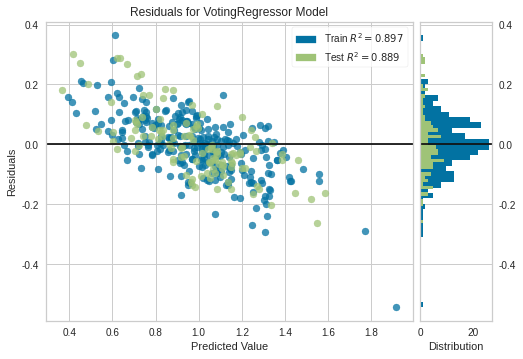

In [56]:
plot_model(final_model_l, plot='residuals')

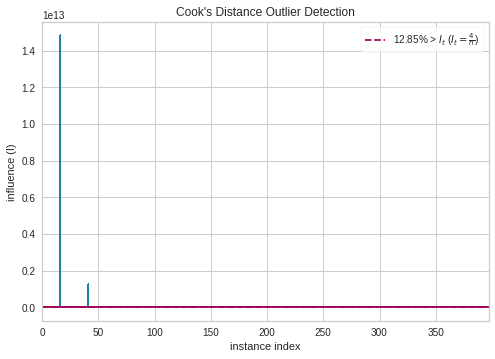

In [57]:
plot_model(final_model_l, plot='cooks')

In [58]:
rf_model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1377,0.0306,0.1750,0.6311,0.0828,0.1332
1,0.1755,0.0474,0.2177,0.3497,0.1218,0.2612
2,0.2481,0.0954,0.3088,0.2105,0.1725,0.4403
3,0.2434,0.1738,0.4169,-0.2691,0.1790,0.1782
4,0.1946,0.0506,0.2250,0.3829,0.1187,0.2420
5,0.2220,0.0807,0.2842,0.0461,0.1556,0.3395
6,0.2202,0.0862,0.2936,0.2637,0.1382,0.2324
7,0.1502,0.0362,0.1902,0.2249,0.0937,0.1433
8,0.1956,0.0619,0.2488,0.1738,0.1377,0.3082
9,0.2148,0.0757,0.2751,0.2394,0.1535,0.3527


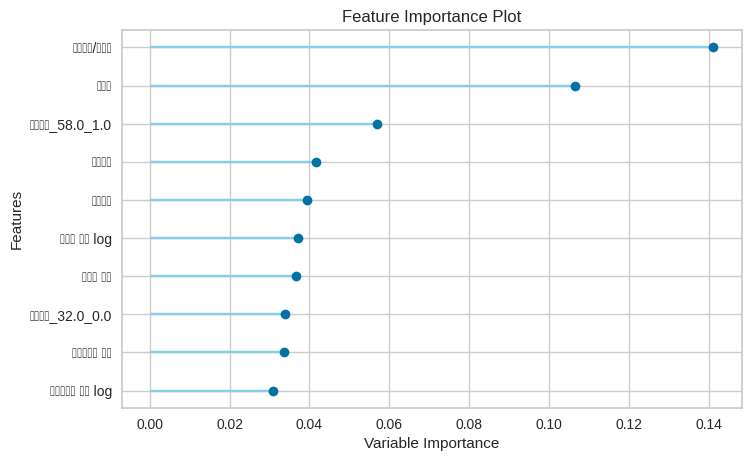

In [59]:
plot_model(rf_model, plot='feature')

In [59]:
sample_submission = pd.read_csv(os.path.join(data_path, 'sample_submission.csv'))
sample_submission.head()

In [60]:
pred_esb_l['예측'] = pred_esb_l['Label'] * pred_esb_l['단지내주차면수']

In [61]:
pred = pred_esb_l.loc['C1072':'C2189', '예측'].values

In [62]:
pred

array([ 711.57144162, 1256.14962725,  530.88704505,  530.43469962,
       1169.99441689, 1866.92882202, 1073.48705793,  538.40107735,
        365.86517684,  257.93332029,  459.04686106,  261.76749334,
        436.07632487,  282.14318165,  278.37188289,  214.62774123,
        499.56460281,  312.55332687,  155.06441577,  620.00463497,
        240.22525307,  402.12558311,  501.25655084,  390.12260846,
        373.97804136,  130.42098691,  130.94658431,  511.52712445,
        482.2070745 ,  529.13078408,  882.87133571,  146.0552325 ,
        489.45810807,  236.7395361 ,   92.27325799,  363.26734693,
        406.63824899,  560.64391698,  762.26927998,  314.48475221,
        474.81386542,  503.84988324,  451.31525496,  587.08967355,
        876.32649004, 1252.96541435,  487.78584573,  568.62479818,
        424.36207591,  366.44330292,  773.90790975,  232.28285764,
        946.83305333,  599.91458646,  637.96855385,  250.53289055,
        602.34467402,  272.05501606,  495.9717376 ,  192.21657